# Iris dataset
Normalize some flowers.

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
%autosave 0

from numpy import cov
from numpy.linalg import eigh
from seaborn import pairplot
from sklearn.decomposition import PCA

from tools import *

Autosave disabled


## get data from `sklearn.datasets`

In [2]:
data = irisdata()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
schema(data)

,dtype,nulls
sepal_length,float64,0
sepal_width,float64,0
petal_length,float64,0
petal_width,float64,0
species,category,0


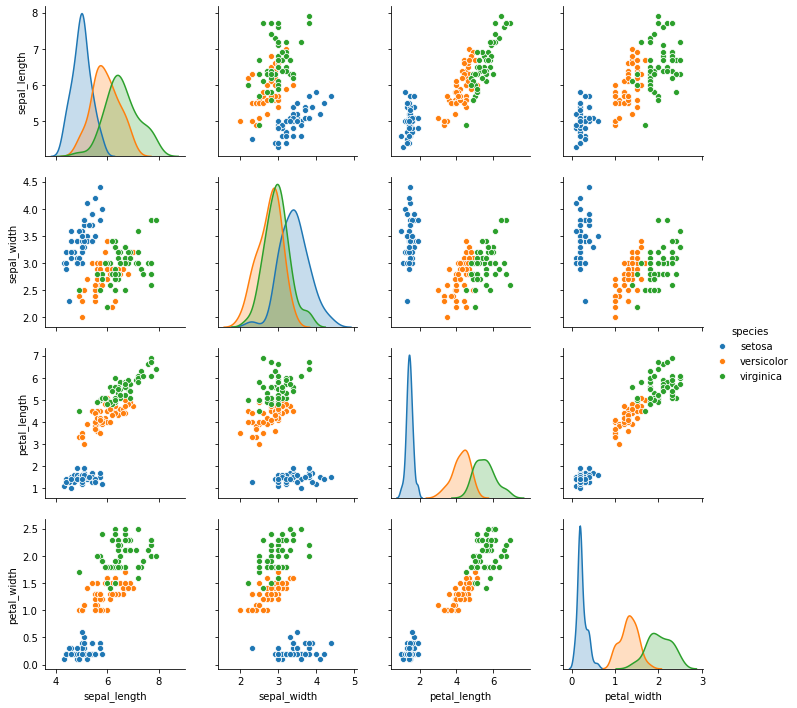

In [4]:
pairplot(data, hue='species')

## separate features from target columns

In [5]:
answers = data['species']
afew(answers)

125     virginica
125     virginica
46         setosa
77     versicolor
27         setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [6]:
clues = data[data.columns.drop('species')]
afew(clues)

,sepal_length,sepal_width,petal_length,petal_width
26,5.0,3.4,1.6,0.4
68,6.2,2.2,4.5,1.5
86,6.7,3.1,4.7,1.5
6,4.6,3.4,1.4,0.3
69,5.6,2.5,3.9,1.1


## standardize data (Z-scores)

In [7]:
zclues = zscores(clues)
zclues.mean()

sepal_length   -1.451617e-15
sepal_width    -1.652752e-15
petal_length   -1.589839e-15
petal_width    -5.491903e-16
dtype: float64

In [8]:
zclues.std()

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

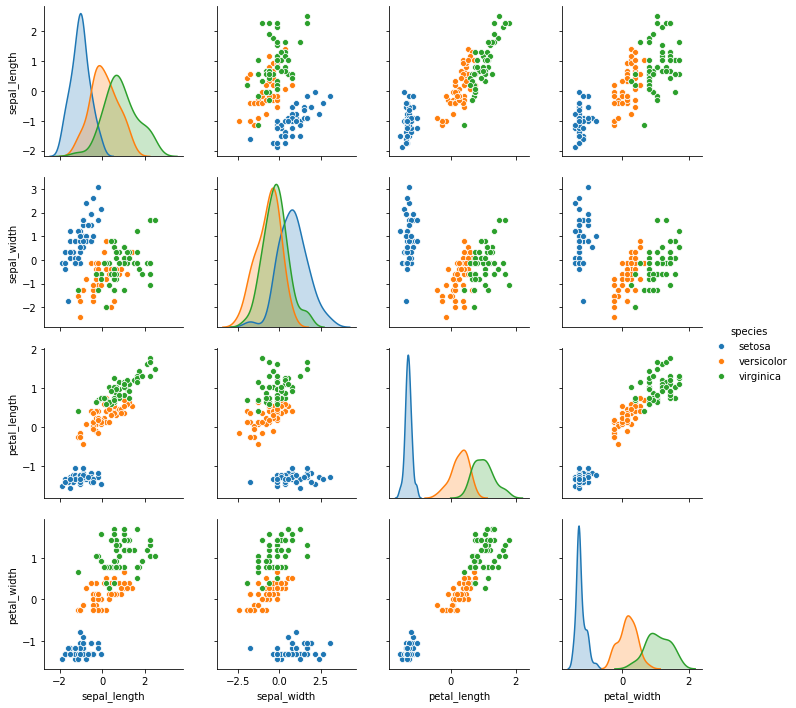

In [9]:
pairplot(zclues.join(answers), hue=answers.name)

## standardize data (median-based)

In [10]:
mclues = zscores(clues, robust=True)
mclues.median()

sepal_length    0.000000e+00
sepal_width     0.000000e+00
petal_length    2.844947e-16
petal_width     0.000000e+00
dtype: float64

In [11]:
mclues.mad()

sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

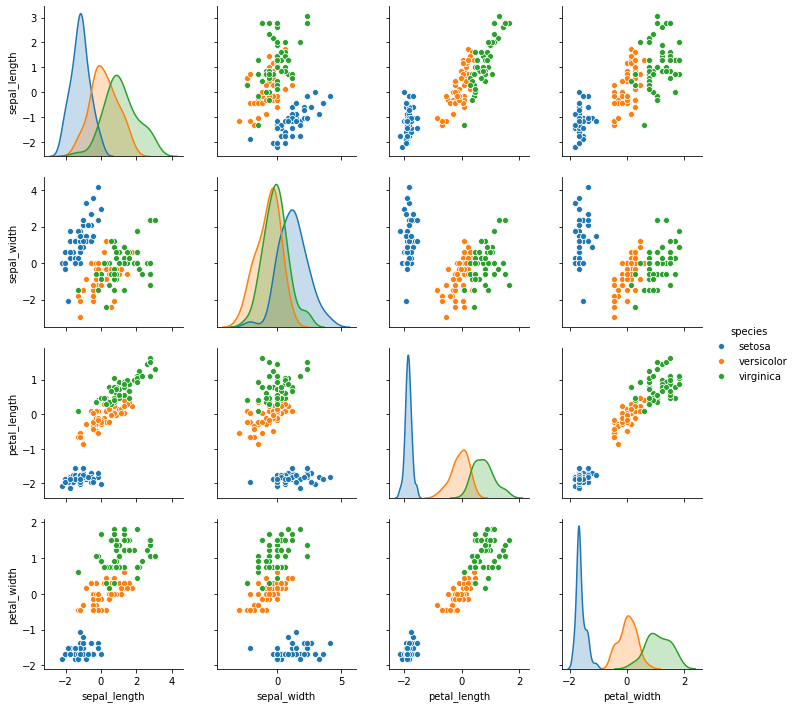

In [12]:
pairplot(mclues.join(answers), hue=answers.name)

## principal components

Use a few new coordinates to approximate a large number of columns.
In this toy example, "a few" means 2 and the "large" number is 4.

https://en.wikipedia.org/wiki/Principal_component_analysis

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.98 ms


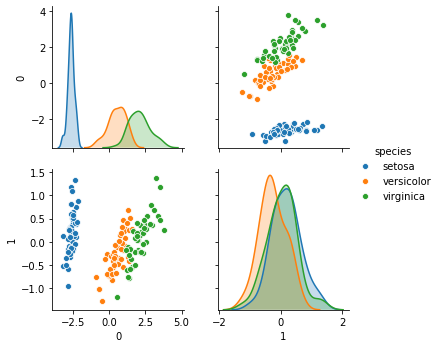

In [13]:
%time pdata = PCA(2).fit_transform(clues)

pdata = DataFrame(pdata).join(answers)
pairplot(pdata, hue=answers.name)

## DIY principal components

`sklearn.decomposition.PCA` uses singular value decomposition tricks to save RAM. This method does not, but it's fast enough for smaller datasets.

https://en.wikipedia.org/wiki/Principal_axis_theorem

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.8 ms
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 392 µs


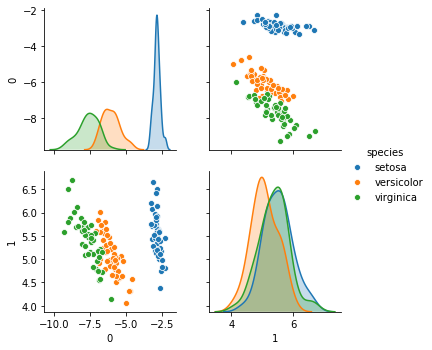

In [14]:
# Find eigenvectors of sample covariance.
%time _, evecs = eigh(cov(clues.T))

# Choose *last* 2 eigenvectors.
%time diy = clues @ evecs[:, -1:-3:-1]

diy = DataFrame(diy).join(answers)
pairplot(diy, hue=answers.name)